# Task 02: Warming Stripes in North Rhine Westphalia (NRW)

**[Ed Hawkins](https://en.wikipedia.org/wiki/Ed_Hawkins_%28climatologist%29) is a professor of climate science at the University of Reading**. He is engaged in science communication conveying climate change in data visualization. He designed the [climate spiral](https://en.wikipedia.org/wiki/Climate_spiral) as well as the [warming stripes](https://en.wikipedia.org/wiki/Warming_stripes).

## Climate Spiral

This animated gif by Ed Hawkins shows the development of monthly temperature differences to the monthly reference temperatures in 1850 (in degree Celsius). 

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/5_9_16_Andrea_TempSpiralEdHawkins.gif/451px-5_9_16_Andrea_TempSpiralEdHawkins.gif"> </img>
<br>
*Fig.: Climate Spiral by Ed Hawkins.* <br>
Source: [Wikipedia, Climate Spiral](https://en.wikipedia.org/wiki/Climate_spiral)

## Warming Stripes

<blockquote>
Warming stripes (sometimes referred to as climate stripes, climate timelines or stripe graphics) are data visualization graphics that use a series of coloured stripes chronologically ordered to visually portray long-term temperature trends. Warming stripes reflect a "minimalist" tyle, conceived to use colour alone to avoid technical distractions and intuitively convey global warming trends to non-scientists. 
[...]
</blockquote>

Source: [Wikipedia, Warming Stripes](https://en.wikipedia.org/wiki/Warming_stripes)



<img src = "https://showyourstripes.info/stripes/GLOBE---1850-2020-MO-withlabels.png" width = 800> </img>
<br>
*Fig.: Warming stripes on a global sclae, from 1850 until 2020* <br>
Source: [showyourstripes.info](https://showyourstripes.info/)


## EXERCISE: Global Warming in NRW 

**We worked on a similar example in lecture and exercises.** Have a look at the video recordings.

Global warming can also be observed on a regional scale. You will investigate the temperature development in the German federal state of North Rhine Westphalia (NRW). You will use the data of the DWD (Deutscher Wetterdienst, German Weather Service).

**Your task is to create a diagram comparable to the warming strips with data from 12 still active meteorological stations in North Rhine-Westphalia**, which provide long annual temperature time series (at least 50 years of data).

### Download data from the DWD CDC archive 

Download the annual temperature data (part of the KL data set) for the stations listed here: <br>
https://github.com/rolfbecker/EE_3.07_Geodata_WS2020/blob/main/gdms0170_DWD_NRW_long_TS/data/derived/DWD_stations_annual_temp_long_TS.csv

You find the description of the climate stations providing mean annual temperature here: <br>
https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/annual/kl/historical/KL_Jahreswerte_Beschreibung_Stationen.txt

Donwload the data (zip archives) for the 12 stations, **move them to the local data directory** `./data/` 
<br>and unzip them in different subdirectories, i.e. on Windows `<right click> -> 'extract all ...'`


#### About the DWD CDC Archive

Additional information about the DWD CDC archive as well as data organization and file formats might be helpful to solve the problem.

* DWD: Deutscher Wetterdient, German Weather Service
* CDC: Climate Data Center

1. DWD CDC main web portal:
<br> https://www.dwd.de/EN/climate_environment/cdc/cdc_en.html
1. Open Data Archive of the DWD CDC: 
<br> https://opendata.dwd.de/climate_environment/CDC/
1. Decription of the CDC climate and environment data archive organization:
<br> https://opendata.dwd.de/climate_environment/CDC/Readme_intro_CDC_ftp.pdf
1. Historical climate data:
<br> https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/annual/kl/historical/




### Read the annual temperature time series from the product files and merge them in a data frame

  1. The files containing the historical time series start with `produkt_klima_jahr_...`. Read the file into a pandas dataframe (we did it several times in class). 
  1. Convert the columns containing dates (e.g. `MESS_DATUM_BEGINN`) to the data type datetime (aka timestamp).
  1. Convert the datetime columns to datetime **with timezone**. The DWD stores the data in UTC. 
  1. Make `MESS_DATUM_BEGINN` the index column (data type datetime with timezone).
  1. Handle the no data values (missing values) appropriately! They should be stored as the special value `NaN`.
  1. Extract the time series with the annual temperatures (Which column?) and convert the series to a data frame. The column of the new data frame should be named after the station id.
  1. Merge these 12 data frames containing the temperature time series into **one wide dataframe** such that they share the same time column. Use **outer join**. Each of the 12 columns  of this big dataframe contains the annual temperature time series of one station. The column name is the station ID.





In [193]:
import pandas as pd
from datetime import datetime
dateparse = lambda dates: [datetime.strptime(str(d), '%Y%m%d') for d in dates]
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np

In [194]:
col_list = ["MESS_DATUM_BEGINN", "JA_TT"]

I will rename all the annual temperature columns by the name of the station as per professor Becker request, so we can avoid renaming again when merging all the columns as he said.

In [195]:
df01078 = pd.read_csv(r'data/jahreswerte_KL_01078_19400101_20201231_hist/produkt_klima_jahr_19400101_20201231_01078.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "01078"}) #instead of annual temperature
df01078

,01078
MESS_DATUM_BEGINN,
1940-01-01,8.82
1941-01-01,9.37
1942-01-01,9.28
1943-01-01,10.64
1944-01-01,10.10
1970-01-01,9.76
1971-01-01,10.38
1972-01-01,9.80
1973-01-01,10.19


In [196]:
df01300 = pd.read_csv(r'data/jahreswerte_KL_01300_19310101_20201231_hist/produkt_klima_jahr_19310101_20201231_01300.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "01300"})
df01300

,01300
MESS_DATUM_BEGINN,
1940-01-01,5.94
1941-01-01,6.80
1942-01-01,6.71
1943-01-01,7.95
1944-01-01,7.40
...,...
2014-01-01,9.41
2016-01-01,8.55
2017-01-01,8.66


In [197]:
df01303 = pd.read_csv(r'data/jahreswerte_KL_01303_18880101_20201231_hist/produkt_klima_jahr_18880101_20201231_01303.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "01303"})
df01303

,01303
MESS_DATUM_BEGINN,
1940-01-01,8.24
1941-01-01,8.78
1942-01-01,8.60
1943-01-01,10.05
1944-01-01,9.35
...,...
2015-01-01,10.92
2016-01-01,10.77
2017-01-01,10.92


In [198]:
df01327 = pd.read_csv(r'data/jahreswerte_KL_01327_19370101_20201231_hist/produkt_klima_jahr_19370101_20201231_01327.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "01327"})
df01327

,01327
MESS_DATUM_BEGINN,
1940-01-01,8.29
1941-01-01,8.75
1942-01-01,8.80
1943-01-01,10.12
1944-01-01,NaN
...,...
2015-01-01,11.06
2016-01-01,10.86
2017-01-01,11.14


In [199]:
df01590 = pd.read_csv(r'data/jahreswerte_KL_01590_19370101_20201231_hist/produkt_klima_jahr_19370101_20201231_01590.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "01590"})
df01590

,01590
MESS_DATUM_BEGINN,
1940-01-01,8.32
1941-01-01,8.90
1942-01-01,8.66
1943-01-01,10.09
1944-01-01,9.62
...,...
2015-01-01,11.10
2016-01-01,10.95
2017-01-01,11.18


In [200]:
df02110 = pd.read_csv(r'data/jahreswerte_KL_02110_19380101_20201231_hist/produkt_klima_jahr_19380101_20201231_02110.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "02110"})
df02110

,02110
MESS_DATUM_BEGINN,
1940-01-01,NaN
1941-01-01,NaN
1942-01-01,NaN
1943-01-01,NaN
1951-01-01,NaN
...,...
2015-01-01,11.30
2016-01-01,11.05
2017-01-01,11.39


In [201]:
df02483 = pd.read_csv(r'data/jahreswerte_KL_02483_19290101_20201231_hist/produkt_klima_jahr_19290101_20201231_02483.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "02483"})
df02483

,02483
MESS_DATUM_BEGINN,
1941-01-01,3.85
1943-01-01,5.67
1944-01-01,4.64
1955-01-01,4.11
1956-01-01,3.34
...,...
2015-01-01,6.36
2016-01-01,6.16
2017-01-01,6.26


In [202]:
df02497 = pd.read_csv(r'data/jahreswerte_KL_02497_19370101_20201231_hist/produkt_klima_jahr_19370101_20201231_02497.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "02497"})
df02497

,02497
MESS_DATUM_BEGINN,
1940-01-01,NaN
1941-01-01,NaN
1942-01-01,NaN
1943-01-01,NaN
1944-01-01,NaN
...,...
2015-01-01,8.84
2016-01-01,8.60
2017-01-01,8.87


In [203]:
df02629 = pd.read_csv(r'data/jahreswerte_KL_02629_18510101_20201231_hist/produkt_klima_jahr_18510101_20201231_02629.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "02629"})
df02629

,02629
MESS_DATUM_BEGINN,
1940-01-01,8.15
1941-01-01,8.74
1942-01-01,8.40
1943-01-01,9.79
1944-01-01,9.47
...,...
2013-01-01,9.75
2014-01-01,11.47
2015-01-01,10.75


In [204]:
df02968 = pd.read_csv(r'data/jahreswerte_KL_02968_19030101_20201231_hist/produkt_klima_jahr_19030101_20201231_02968.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "02968"})
df02968

,02968
MESS_DATUM_BEGINN,
1940-01-01,8.89
1941-01-01,9.46
1942-01-01,9.57
1943-01-01,10.83
1944-01-01,10.22
...,...
2015-01-01,11.92
2016-01-01,11.64
2017-01-01,11.92


In [205]:
df04371 = pd.read_csv(r'data/jahreswerte_KL_04371_19310101_20201231_hist/produkt_klima_jahr_19310101_20201231_04371.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "04371"})
df04371

,04371
MESS_DATUM_BEGINN,
1940-01-01,7.38
1941-01-01,8.25
1942-01-01,8.07
1943-01-01,9.69
1944-01-01,9.20
...,...
2015-01-01,10.36
2016-01-01,10.13
2017-01-01,10.22


In [206]:
df05717 = pd.read_csv(r'data/jahreswerte_KL_05717_19070101_20201231_hist/produkt_klima_jahr_19070101_20201231_05717.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", usecols=col_list,
                     parse_dates = ["MESS_DATUM_BEGINN"], date_parser = dateparse,
                     na_values = [-999.0, -999]).loc['1940-01-01':'2019-12-31'].rename(columns
                     ={"JA_TT" : "05717"})
df05717

,05717
MESS_DATUM_BEGINN,
1940-01-01,8.50
1941-01-01,9.03
1942-01-01,9.02
1948-01-01,9.76
1949-01-01,NaN
...,...
2015-01-01,10.62
2016-01-01,10.41
2017-01-01,10.66


**Merge these 12 data frames containing the temperature time series into one wide dataframe such that they share the same time column. Use outer join. Each of the 12 columns of this big dataframe contains the annual temperature time series of one station. The column name is the station ID.**

In [207]:
df_merge1 = pd.merge(df01078,df01300, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge2 = pd.merge(df01303,df01327, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge3 = pd.merge(df01590,df02110, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge4 = pd.merge(df02483,df02497, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge5 = pd.merge(df02629,df02968, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge6 = pd.merge(df04371,df05717, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge7 = pd.merge(df_merge1,df_merge2, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge8 = pd.merge(df_merge3,df_merge4, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge9 = pd.merge(df_merge5,df_merge6, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge10 = pd.merge(df_merge7,df_merge8, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge = pd.merge(df_merge9,df_merge10, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge

,02629,02968,04371,05717,01078,01300,01303,01327,01590,02110,02483,02497
MESS_DATUM_BEGINN,,,,,,,,,,,,
1940-01-01,8.15,8.89,7.38,8.50,8.82,5.94,8.24,8.29,8.32,NaN,NaN,NaN
1941-01-01,8.74,9.46,8.25,9.03,9.37,6.80,8.78,8.75,8.90,NaN,3.85,NaN
1942-01-01,8.40,9.57,8.07,9.02,9.28,6.71,8.60,8.80,8.66,NaN,NaN,NaN
1943-01-01,9.79,10.83,9.69,NaN,10.64,7.95,10.05,10.12,10.09,NaN,5.67,NaN
1944-01-01,9.47,10.22,9.20,NaN,10.10,7.40,9.35,NaN,9.62,NaN,4.64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,11.17,12.30,10.89,10.99,11.84,9.01,11.44,11.24,11.62,11.42,7.00,9.27
1991-01-01,NaN,10.93,9.36,9.45,10.57,7.42,9.72,9.66,9.80,9.77,5.02,7.47
1992-01-01,NaN,11.77,10.13,10.40,11.35,8.41,10.53,10.69,10.65,10.64,6.04,8.29


<br>

### Plot the 12 time series

Use the **Pandas series plot function** (not matplotlib.pyplot.plot() !) to create 12 line graphs (scatter plots, x-y-plots) in one diagram! Label the axes appropriately. Add a title. Create a legend. 

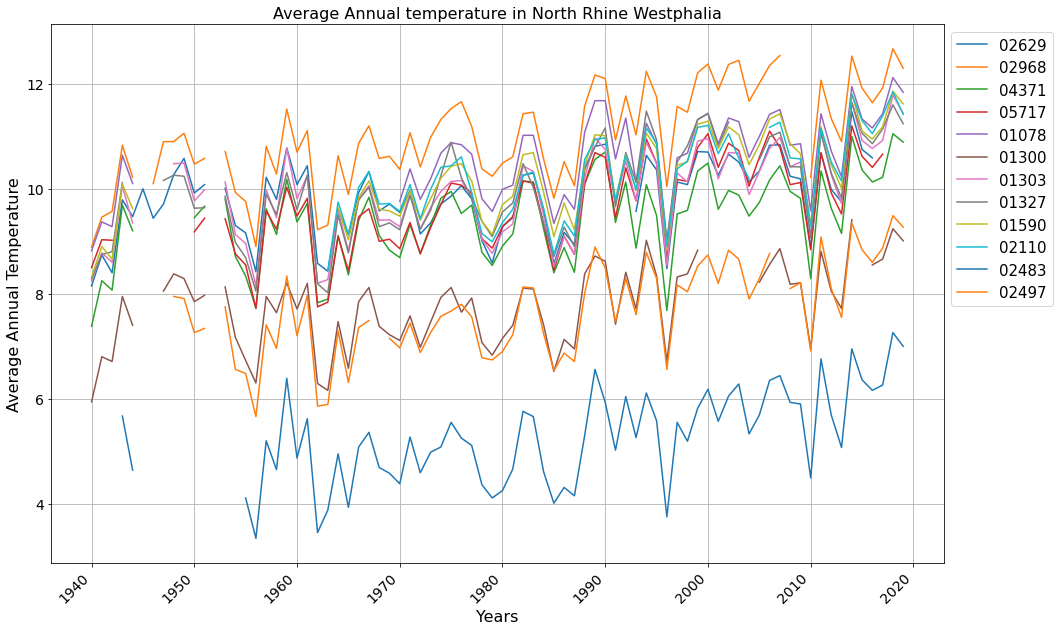

In [208]:
fig1 = ax1 = df_merge.plot(y=["02629","02968","04371","05717","01078",
                              "01300","01303","01327","01590","02110","02483","02497"],
           kind="line", figsize=(16,11), grid = True)
plt.title('Average Annual temperature in North Rhine Westphalia', fontsize=16)
plt.xlabel('Years',  fontsize=16)
plt.ylabel('Average Annual Temperature',  fontsize=16)
plt.tick_params(axis='x', rotation = 45,  labelsize=14)
plt.tick_params(axis='y',  labelsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop=dict(size=15))
plt.show()

### Compare the stations 1303 and 2483

1. Produce a scatter plot with just these two series. What do you observe?
1. Subtract the two curves and plot the difference in another figure. What do you observe? Can you explain it?
1. Limit the analysis to the time interval 1970 to 2020. Plot the temperatures of station 1303 on the x-axis and of station 2483 on the y-axis. What do you observe?


**Produce a scatter plot with just these two series. What do you observe?**

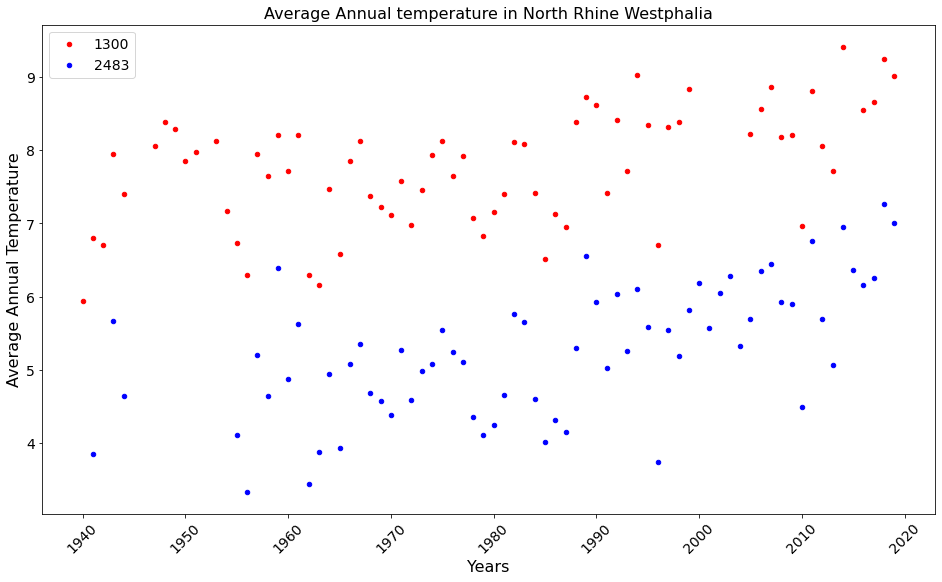

In [209]:
fig2 = ax = df01300.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='01300',
                                       color = 'red', label = '1300', figsize = (16,9))
df02483.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='02483',
                           color = 'blue', label = '2483', ax = ax) 
plt.title('Average Annual temperature in North Rhine Westphalia', fontsize=16)
plt.xlabel('Years',  fontsize=16)
plt.legend(fontsize = 14)
plt.ylabel('Average Annual Temperature',  fontsize=16)
plt.tick_params(axis='x', rotation = 45,  labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

**Subtract the two curves and plot the difference in another figure. What do you observe? Can you explain it?**

In [210]:
df_merge_difference = pd.merge(df01300,df02483, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_difference

,01300,02483
MESS_DATUM_BEGINN,,
1940-01-01,5.94,NaN
1941-01-01,6.80,3.85
1942-01-01,6.71,NaN
1943-01-01,7.95,5.67
1944-01-01,7.40,4.64
...,...,...
2001-01-01,NaN,5.57
2002-01-01,NaN,6.05
2003-01-01,NaN,6.28


In [211]:
df_difference = df_merge_difference['01300'].subtract(df_merge_difference['02483'])

print(df_difference)

MESS_DATUM_BEGINN
1940-01-01     NaN
1941-01-01    2.95
1942-01-01     NaN
1943-01-01    2.28
1944-01-01    2.76
              ... 
2001-01-01     NaN
2002-01-01     NaN
2003-01-01     NaN
2004-01-01     NaN
2015-01-01     NaN
Length: 78, dtype: float64


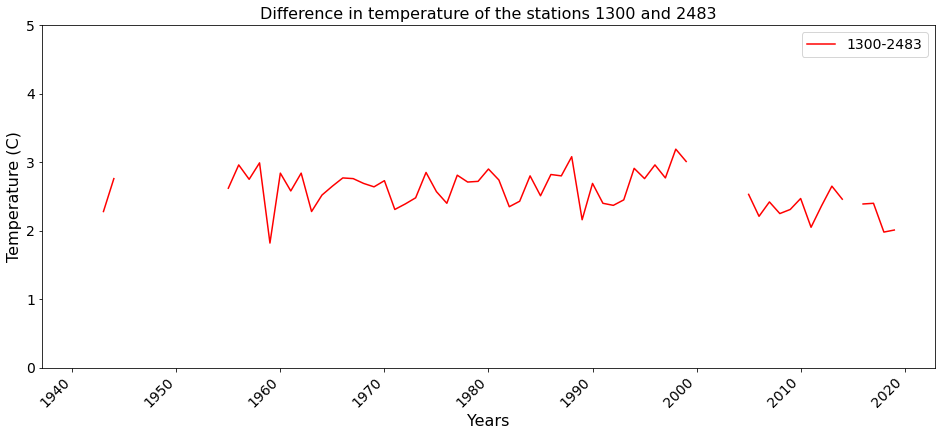

In [212]:
fig3 = ax = df_difference.plot(x= 'MESS_DATUM_BEGINN', color = 'red', label = '1300-2483', figsize = (16,7))
plt.title('Difference in temperature of the stations 1300 and 2483', fontsize=16)
plt.xlabel('Years',  fontsize=16)
plt.ylabel('Temperature (C)',  fontsize=16)
plt.legend(fontsize = 14)
plt.tick_params(axis='x', rotation = 45,  labelsize=14)
plt.tick_params(axis='y',  labelsize=14)
ax.set_ylim(0,5)
plt.show()

The graph indicates that the difference of the annual average temperature between the 2 stations is almost between 1 and 4 degrees celsius all the time. The station number 1300 is located in Eslohe and the city altitude according to (wikimedia) is 350 meters above the sea, and the station number 2483 is located in the city of Kahler Asten. According to wikipedia, Kahler Asten is 842 meters above the sea. This result confirms that the city of Kahler Asten is almost colder than Eslohe between 1 and 4 degrees celsius all the time and logically when going up for 492 meters in altitude above the sea, the temperature will drop. That's why the difference is almost the same all the time.



**Limit the analysis to the time interval 1970 to 2020.**

When limiting the analyse between 1970 anad 2020 I couldn't find any difference. The temperature difference between the 2 stations is still the same almost between 1 and 4 degrees. Maybe the last couple of years the difference is getting closer little bit in the direction under 1 degree.

**Plot the temperatures of station 1303 on the x-axis and of station 2483 on the y-axis. What do you observe?**

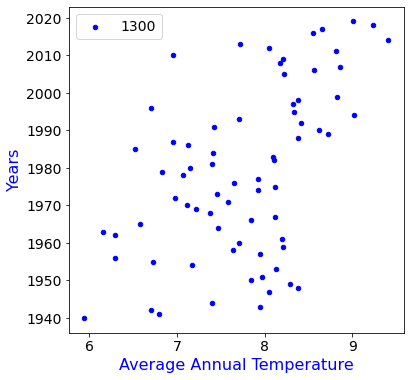

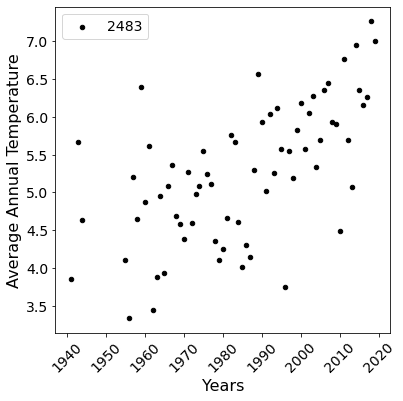

In [213]:
fig4 = ax = df01300.reset_index().plot(kind = 'scatter', x='01300', y='MESS_DATUM_BEGINN',
                                      label = '1300', color = 'blue', figsize = (6,6))

plt.xlabel('Average Annual Temperature', color = 'blue', fontsize=16)
plt.ylabel('Years', color = 'blue', fontsize=16)
plt.legend(fontsize = 14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

ax2 = df02483.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='02483',
                                       label = '2483', color = 'black', figsize = (6,6))
plt.xlabel('Years', fontsize=16)
plt.ylabel('Average Annual Temperature', fontsize=16)
plt.legend(fontsize = 14)
plt.tick_params(axis='x', rotation = 45,  labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

Looking at both graphs, the points are kind off going up when going right. Whenever more years are added either in the y-axis in the first graph or in the x-axis in the second graph, the temperature is going slightly up. It is almost a positive relation between the temperature and the years.

### Analyse the temperature differences relative to a reference temperature

Determine for each of the 12 time series the average annual temperature of the years 1961 to 1990 and use them as a reference. Subtract these reference temperatures from the respective time series to investigate the time series of the temperature differences. Name the resulting dataframe `df_diff`. Plot them in a scatter plot. What is the difference to the plot you produced before, e.g. when you compare 1303 and 2483?


Now working on new dates and identifying the mean of each dataframe

In [214]:
df01078_1 = df01078.loc['1961-01-01':'1990-12-31']
df01078mean = df01078_1.mean()
df01078mean

01078    10.387143
dtype: float64

In [215]:
df01300_1 = df01300.loc['1961-01-01':'1990-12-31']
df01300mean = df01300_1.mean()
df01300mean

01300    7.48
dtype: float64

In [216]:
df01303_1 = df01303.loc['1961-01-01':'1990-12-31']
df01303mean = df01303_1.mean()
df01303mean

01303    9.560667
dtype: float64

In [217]:
df01327_1 = df01327.loc['1961-01-01':'1990-12-31']
df01327mean = df01327_1.mean()
df01327mean

01327    9.636667
dtype: float64

In [218]:
df01590_1 = df01590.loc['1961-01-01':'1990-12-31']
df01590mean = df01590_1.mean()
df01590mean

01590    9.912222
dtype: float64

In [219]:
df02110_1 = df02110.loc['1961-01-01':'1990-12-31']
df02110mean = df02110_1.mean()
df02110mean

02110    9.807143
dtype: float64

In [220]:
df02483_1 = df02483.loc['1961-01-01':'1990-12-31']
df02483mean = df02483_1.mean()
df02483mean

02483    4.847333
dtype: float64

In [221]:
df02497_1 = df02497.loc['1961-01-01':'1990-12-31']
df02497mean = df02497_1.mean()
df02497mean

02497    7.27931
dtype: float64

In [222]:
df02629_1 = df02629.loc['1961-01-01':'1990-12-31']
df02629mean = df02629_1.mean()
df02629mean

02629    9.613
dtype: float64

In [223]:
df02968_1 = df02968.loc['1961-01-01':'1990-12-31']
df02968mean = df02968_1.mean()
df02968mean

02968    10.78
dtype: float64

In [224]:
df04371_1 = df04371.loc['1961-01-01':'1990-12-31']
df04371mean = df04371_1.mean()
df04371mean

04371    9.237333
dtype: float64

In [225]:
df05717_1 = df05717.loc['1961-01-01':'1990-12-31']
df05717mean = df05717_1.mean()
df05717mean

05717    9.335333
dtype: float64

Now we have to outer merge again the new data frames in the date provided and than we subtract the mean from each column

In [226]:
df_merge_1 = pd.merge(df01078_1,df01300_1, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_2 = pd.merge(df01303_1,df01327_1, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_3 = pd.merge(df01590_1,df02110_1, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_4 = pd.merge(df02483_1,df02497_1, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_5 = pd.merge(df02629_1,df02968_1, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_6 = pd.merge(df04371_1,df05717_1, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_7 = pd.merge(df_merge_1,df_merge_2, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_8 = pd.merge(df_merge_3,df_merge_4, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_9 = pd.merge(df_merge_5,df_merge_6, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_10 = pd.merge(df_merge_7,df_merge_8, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_new = pd.merge(df_merge_9,df_merge_10, on = "MESS_DATUM_BEGINN", how = "outer")
df_merge_new

,02629,02968,04371,05717,01078,01300,01303,01327,01590,02110,02483,02497
MESS_DATUM_BEGINN,,,,,,,,,,,,
1961-01-01,10.44,11.11,9.72,9.82,NaN,8.20,10.25,10.26,NaN,NaN,5.62,7.97
1962-01-01,8.58,9.22,7.83,7.75,NaN,6.29,8.20,8.19,NaN,NaN,3.45,5.86
1963-01-01,8.43,9.31,7.90,7.84,NaN,6.16,8.27,8.02,NaN,8.44,3.88,5.89
1964-01-01,9.61,10.63,9.11,9.09,NaN,7.47,9.58,9.50,9.64,9.75,4.95,7.29
1965-01-01,9.13,9.89,8.36,8.44,NaN,6.58,8.82,8.78,9.03,9.13,3.93,6.31
1966-01-01,9.93,10.87,9.40,9.47,NaN,7.85,9.79,9.79,9.83,10.03,5.08,7.36
1967-01-01,10.33,11.20,9.84,9.62,NaN,8.12,10.06,10.03,10.15,10.33,5.36,7.49
1968-01-01,9.58,10.58,9.11,9.00,NaN,7.38,9.40,9.28,9.61,9.71,4.69,NaN
1969-01-01,9.71,10.62,8.83,9.04,NaN,7.22,9.41,9.35,9.58,9.72,4.58,7.15


In [227]:
for x in df_merge_new.columns:
    df_merge_new[x] = df_merge_new[x] - df_merge_new[x].mean()
    df_diff = df_merge_new
df_diff

,02629,02968,04371,05717,01078,01300,01303,01327,01590,02110,02483,02497
MESS_DATUM_BEGINN,,,,,,,,,,,,
1961-01-01,0.827,0.33,0.482667,0.484667,NaN,0.72,0.689333,0.623333,NaN,NaN,0.772667,0.69069
1962-01-01,-1.033,-1.56,-1.407333,-1.585333,NaN,-1.19,-1.360667,-1.446667,NaN,NaN,-1.397333,-1.41931
1963-01-01,-1.183,-1.47,-1.337333,-1.495333,NaN,-1.32,-1.290667,-1.616667,NaN,-1.367143,-0.967333,-1.38931
1964-01-01,-0.003,-0.15,-0.127333,-0.245333,NaN,-0.01,0.019333,-0.136667,-0.272222,-0.057143,0.102667,0.01069
1965-01-01,-0.483,-0.89,-0.877333,-0.895333,NaN,-0.90,-0.740667,-0.856667,-0.882222,-0.677143,-0.917333,-0.96931
1966-01-01,0.317,0.09,0.162667,0.134667,NaN,0.37,0.229333,0.153333,-0.082222,0.222857,0.232667,0.08069
1967-01-01,0.717,0.42,0.602667,0.284667,NaN,0.64,0.499333,0.393333,0.237778,0.522857,0.512667,0.21069
1968-01-01,-0.033,-0.20,-0.127333,-0.335333,NaN,-0.10,-0.160667,-0.356667,-0.302222,-0.097143,-0.157333,NaN
1969-01-01,0.097,-0.16,-0.407333,-0.295333,NaN,-0.26,-0.150667,-0.286667,-0.332222,-0.087143,-0.267333,-0.12931


Plotting the results in scatter plot

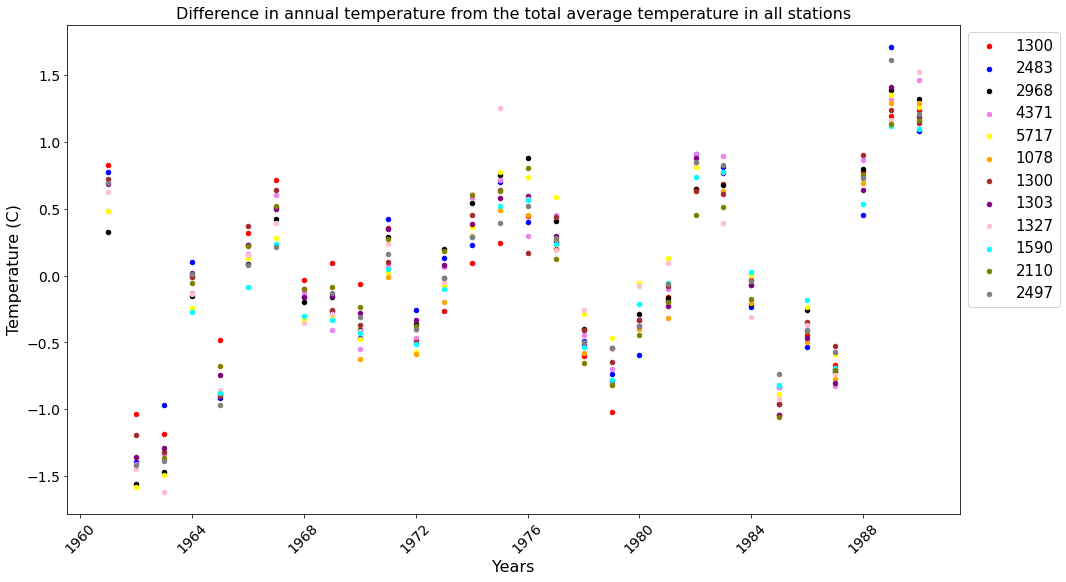

In [228]:
fig5 = ax = df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='02629',
                                       color = 'red', label = '1300', figsize = (16,9))
df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='02483',
                           color = 'blue', label = '2483', ax = ax)
df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='02968',
                           color = 'black', label = '2968', ax = ax)
df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='04371',
                           color = 'violet', label = '4371', ax = ax)
df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='05717',
                           color = 'yellow', label = '5717', ax = ax)
df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='01078',
                           color = 'orange', label = '1078', ax = ax)
df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='01300',
                           color = 'brown', label = '1300', ax = ax)
df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='01303',
                           color = 'purple', label = '1303', ax = ax)
df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='01327',
                           color = 'pink', label = '1327', ax = ax)
df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='01590',
                           color = 'cyan', label = '1590', ax = ax)
df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='02110',
                           color = 'olive', label = '2110', ax = ax)
df_diff.reset_index().plot(kind = 'scatter', x='MESS_DATUM_BEGINN', y='02497',
                           color = 'gray', label = '2497', ax = ax)

plt.title('Difference in annual temperature from the total average temperature in all stations', fontsize=16)
plt.xlabel('Years',  fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop=dict(size=15))
plt.ylabel('Temperature (C)',  fontsize=16)
plt.tick_params(axis='x', rotation = 45,  labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

Wow! The difference of the temperature in all the stations comparing to each others are almost half to one degree all the time. The temperature in a given year for example in year 1962 and 1963 were lower than the average from -1.5 degrees to -1 degrees in all the stations, and looking at warmer years for example in the last 2 years 1989 and 1990, the temperature difference from the average in all the stations are almost between 1 and 1.5 degrees celsius. So the wave that comes to the region either warm or cold affect all the cities in the same range.<br>
When we compared the difference temperature in 2 stations. The difference is alost the same throughout all the years.
So either comparing the data from the average yearly temperature in all stations, or comparing the difference in temperatures between stations, we find that the datas confirm that the temperature differences are almost the same in all the stations throughout the year, this depends on the geographical location for example altitude, near the river water, and other factors.<br>
We can see also from the graph that the difference of the temperature from the average is moving up mostly in latest years, so the temperature is getting warmer by the time.

### Produce a heatmap 

Use seaborn to plot a heatmap of `df_diff`. Plot the time on x-axis (transpose?). You will get 12 horizontal color bars stacked vertically. Choose a color scale such that negative values are blue and positive values are red. Compare it to the warming stripes. Discuss.

In [232]:
import seaborn as sns
from datetime import datetime
dateparse = lambda dates: [datetime.strptime(str(d), '%Y%m%d') for d in dates]

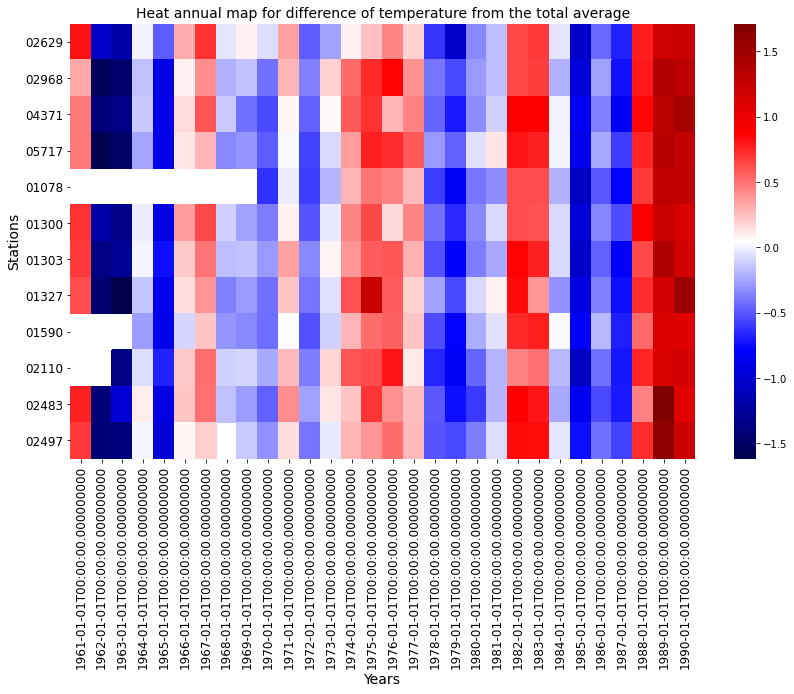

In [233]:
df_diff_T = df_diff.T #transpose the data frame first and then we plot the heatmap

fig6 = plt.figure(figsize=(14, 8))
heat_map = sns.heatmap(df_diff_T, cmap="seismic")
heat_map.set_title("Heat annual map for difference of temperature from the total average", fontsize = 14)
heat_map.set_ylabel("Stations", fontsize = 14)
heat_map.set_xlabel("Years", fontsize = 14)
heat_map.tick_params(axis='y', rotation = 0,  labelsize=12)
heat_map.tick_params(axis='x',  labelsize=12)
plt.show()

Looking at the graph we can conclude that the blue color is mostly concentrated on the left side, and the red color is more concentrated on the right. we can conclude that the temperature is getting warmer by the time because the difference of the temperature from the total average temperature is getting positive and more red by the time.
Looking at our fig1, we can conclude the same that the temperature is getting warmer.
Both graphs confirm that the temperature is getting warmer either if we look at the temperature change data of the stations directly or if we compare to the total average temperature of more than 30 years, we can conclude that the temperature is getting warmer.

**References**<br>
https://commons.wikimedia.org/wiki/Category:Bremscheid_(Eslohe)<br>
https://en.wikipedia.org/wiki/Kahler_Asten<br>